# Conociendo la empresa

In [342]:
import empiricaldist
#import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import warnings

#Quitar advertencias en los codigos
warnings.filterwarnings('ignore')

# Ver Datasets completos
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.0f}'.format

In [343]:
df_people = pd.read_excel('data\\01 Colaboradores.xlsx') # Cuenta con el listado de colaboradores de la compañía y algunos datos demográficos.
df_jobs = pd.read_csv('data\\02 Cargos.txt', delimiter = "\t")
df_areas = pd.read_csv('data\\03 Areas.csv',encoding='latin-1', delimiter = ";" )
df_horas = pd.read_csv('data\\04 Horas_Contratadas.csv', delimiter = ";")
df_ausentismo  = pd.read_excel('data\\05 Ausentismo_Incapacidades.xlsx')

In [344]:
print(df_people.columns)
#print(df_people.size)
print("----------------------------------------------------")
print(df_jobs.columns)
print("----------------------------------------------------")
print(df_areas.columns)
print("----------------------------------------------------")
print(df_horas.columns)
print("----------------------------------------------------")
print(df_ausentismo.columns)

Index(['id_colaborador', 'genero', 'edad'], dtype='object')
----------------------------------------------------
Index(['cargo', 'codigo_cargo'], dtype='object')
----------------------------------------------------
Index(['codigo_area', 'area'], dtype='object')
----------------------------------------------------
Index(['id_colab_periodo', 'id_colaborador', 'periodo', 'horas_contratadas',
       'codigo_cargo', 'codigo_area'],
      dtype='object')
----------------------------------------------------
Index(['id_colab_periodo', 'id_colaborador', 'periodo', 'h_incapacidades',
       'h_ausentismo'],
      dtype='object')


# Modelo Dimencional

![1](capturas/modelo%20dimencional.drawio.png)

In [345]:
df_left_asuen_horas = df_ausentismo.merge(df_horas, left_on=['id_colab_periodo'], right_on=['id_colab_periodo'], how='left')
df_left_asuen_horas_people = df_left_asuen_horas.merge(df_people, left_on=['id_colaborador_x'], right_on=['id_colaborador'], how='left')
df_left_asuen_horas_people_jobs = df_left_asuen_horas_people.merge(df_jobs , left_on=['codigo_cargo'], right_on=['codigo_cargo'], how='left')
df_left_asuen_horas_people_jobs_area = df_left_asuen_horas_people_jobs.merge(df_areas , left_on=['codigo_area'], right_on=['codigo_area'], how='left')

# La Gran Tabla

In [346]:
tabla_big_table = df_left_asuen_horas_people_jobs_area
tabla_big_table

,id_colab_periodo,id_colaborador_x,periodo_x,h_incapacidades,h_ausentismo,id_colaborador_y,periodo_y,horas_contratadas,codigo_cargo,codigo_area,id_colaborador,genero,edad,cargo,area
0,101434-201901,101434,201901,0,0,101434,201901,50,4L1081,A0240,101434,M,36,ANALISTA 3,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...
1,101463-201901,101463,201901,0,5,101463,201901,113,4L1081,A0128,101463,H,50,ANALISTA 3,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...
2,101484-201901,101484,201901,0,0,101484,201901,72,4L1081,A0245,101484,M,29,ANALISTA 3,SUBSIDIO PARA NO AFILIADOS - 21304 / CENTRO D...
3,101675-201901,101675,201901,0,0,101675,201901,129,4L1081,A0128,101675,H,38,ANALISTA 3,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...
4,101731-201901,101731,201901,0,0,101731,201901,188,4L1081,A0240,101731,H,24,ANALISTA 3,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46395,100743-202006,100743,202006,0,6,100743,202006,107,5A1014,A0090,100743,M,54,ASESOR COMERCIAL 1,DIAGNÓSTICA - 30402002 / CHIA
46396,100745-202006,100745,202006,4,3,100745,202006,91,4K1171,A0210,100745,M,29,TECNICO 4,PREVENTIVA - 30402001 / CALLE 98
46397,100774-202006,100774,202006,0,3,100774,202006,145,5A1014,A0090,100774,M,47,ASESOR COMERCIAL 1,DIAGNÓSTICA - 30402002 / CHIA
46398,100797-202006,100797,202006,0,6,100797,202006,109,5A1014,A0090,100797,M,51,ASESOR COMERCIAL 1,DIAGNÓSTICA - 30402002 / CHIA


# 1. Distribución poblacional de trabajadores por edad y género.

In [347]:
distribucion_e_g = tabla_big_table.groupby(['id_colaborador','genero','edad']).size()
distribucion_e_g = pd.DataFrame(distribucion_e_g).reset_index()
distribucion_e_g = (
    distribucion_e_g
    .assign(is_genero = lambda df : df['genero'].replace(['M',
    'H'],[1,0]))
)
distribucion_e_g

,id_colaborador,genero,edad,0,is_genero
0,100000,M,34,19,1
1,100001,M,28,18,1
2,100002,M,52,19,1
3,100003,H,28,19,0
4,100004,M,50,18,1
...,...,...,...,...,...
2441,102447,M,57,19,1
2442,102448,M,39,18,1
2443,102449,M,31,18,1
2444,102450,H,47,19,0


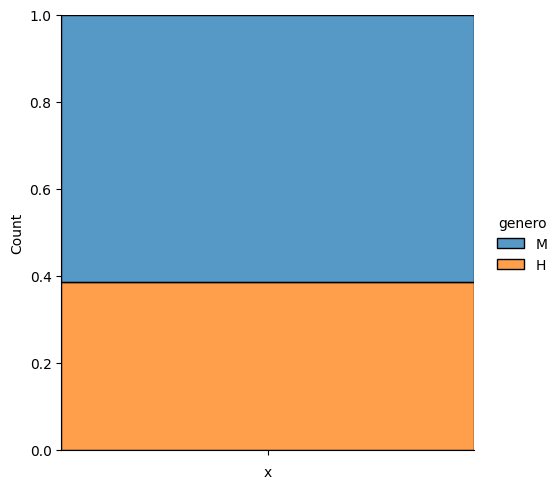

In [348]:
distribucion_e_g['x'] = ''
distribucion_e_g.pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='genero',
                multiple='fill'
            )
        )
    )

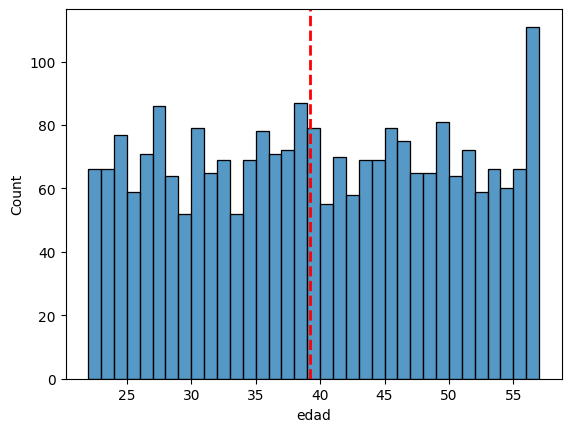

In [349]:
sns.histplot(
    data=distribucion_e_g,
    x='edad',
    binwidth=1
)


plt.axvline(
    x =distribucion_e_g['edad'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)

<AxesSubplot: xlabel='edad', ylabel='genero'>

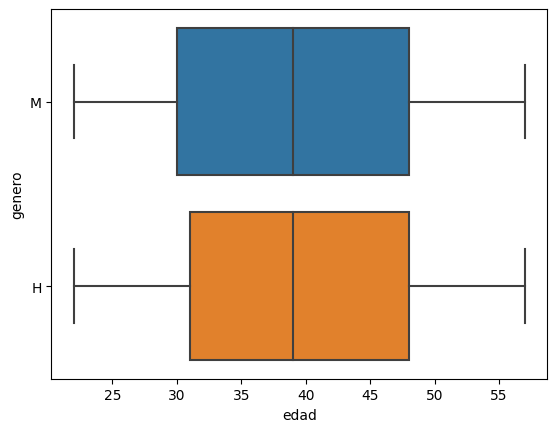

In [350]:
sns.boxplot(
    data=distribucion_e_g,
    x='edad',
    y='genero'
)

# Número de colaboradores únicos por Cargo

In [351]:
distribucion_c = tabla_big_table.groupby(['id_colaborador']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'cantidad_cargos': len(x['codigo_cargo'].unique())
                                }))
distribucion_c = pd.DataFrame(distribucion_c).reset_index()
distribucion_c = distribucion_c.sort_values(by=['cantidad_cargos'], ascending=False)
distribucion_c = distribucion_c.reset_index(drop=True)
distribucion_c

,id_colaborador,cantidad_cargos
0,100000,4
1,100808,4
2,100812,4
3,100813,4
4,100814,4
...,...,...
2441,102141,1
2442,101495,1
2443,101543,1
2444,100961,1


# Número de colaboradores únicos por area

In [352]:
distribucion_a = tabla_big_table.groupby(['id_colaborador']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'cantidad_areas': len(x['codigo_area'].unique())
                                }))
distribucion_a = pd.DataFrame(distribucion_a).reset_index()
distribucion_a = distribucion_a.sort_values(by=['cantidad_areas'], ascending=False)
distribucion_a = distribucion_a.reset_index(drop=True)
distribucion_a

,id_colaborador,cantidad_areas
0,100000,5
1,100704,5
2,100708,5
3,100710,5
4,100712,5
...,...,...
2441,100387,1
2442,101898,1
2443,101495,1
2444,102243,1


# Comportamiento del ausentismo (ausentismos + incapacidades) por mes x cargo.

In [353]:
comportamiento_ausentis = tabla_big_table.groupby(['cargo','periodo_x']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'h_ausentismo': x['h_incapacidades'].unique().sum() + x['h_ausentismo'].unique().sum()
                                }))
comportamiento_ausentis = pd.DataFrame(comportamiento_ausentis).reset_index()
comportamiento_ausentis = comportamiento_ausentis.sort_values(by=['h_ausentismo'], ascending=False)
comportamiento_ausentis = comportamiento_ausentis.reset_index(drop=True)
comportamiento_ausentis

,cargo,periodo_x,h_ausentismo
0,TECNICO 4,202005,2903
1,TECNICO 4,202006,2898
2,TECNICO 4,201911,2427
3,TECNICO 4,202004,2375
4,TECNICO 4,201909,2370
...,...,...,...
331,ANALISTA 2,201910,0
332,TECNICO 2,202002,0
333,ASESOR EMPRESARIAL,201903,0
334,ANALISTA 2,201911,0


# Top de colaboradores con mayor % de ausentismo (ausentismos + incapacidades)

In [354]:
ausentismo_tra = tabla_big_table.groupby(['id_colaborador']\
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'h_ausentismo': x['h_incapacidades'].sum() + x['h_ausentismo'].sum()
                                }))
ausentismo_tra = pd.DataFrame(ausentismo_tra).reset_index()
ausentismo_tra = ausentismo_tra.sort_values(by=['h_ausentismo'], ascending=False)
ausentismo_tra = ausentismo_tra.reset_index(drop=True)
ausentismo_tra.head(5)

,id_colaborador,h_ausentismo
0,101043,3032
1,101581,2728
2,101870,1872
3,101947,1848
4,101496,1272


# Data Analisis

In [355]:
tabla_big_table.to_csv('data\data_tableau.csv',index=False)